
# Introduction 

## New York City (NYC), often called The City or simply New York (NY), is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy

## Many districts and landmarks in New York City are well known, including three of the world's ten most visited tourist attractions in 2013. A record 62.8 million tourists visited New York City in 2017. Times Square is the brightly illuminated hub of the Broadway Theater District, one of the world's busiest pedestrian intersections, and a major center of the world's entertainment industry.

## With all thse complementary tourist attractions there is a need for a diverse food culture in order to satisfy everyone. Whether this be French, Italian, American, or Chinese. Each neighborhoods needs to be able to provide at least a couple in their district. 

## For this final project I have chosen to explore Japanese Restaurants in New York City specifically in Manhattan and where a person would possibly open a Japanese restaurant.

# Using Data
## In this project the following data will be used:

## Source: https://cocl.us/new_york_dataset
## This will give me the necessary information explore the neighborhoods in New York City

## Foursquare API
## In using Foursquare I can grab the venues in each neighborhood of New York City








# Why this will be helpful?
## With this data it will answe questions such as
## 1. Which neighborhood areas in Manhattan don't provide Japanese Cuisine?
## 2. Where is the best place to live if an individual prefers to eat Japanese food?
## 3. Where is the best neighborhood in New York City for Japanese Cuisine?

# Methodology
 
## For this project I mostly focused on using folium maps to analyze the number of Japanese restaurants and cross mapped it with the boroughs of Manhattan in New York City.

In [3]:
!pip install folium
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup


import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [6]:
CLIENT_ID = '0EKUN1AMSM4SZSXJ0YZASVICCFHXRJOFGRH5O0G121CLEFRF' # your Foursquare ID
CLIENT_SECRET = 'KOIPKN3OXVYUJ5D3VPCOCLHBYAHAXFJFAN1ADWE5KGZ031FP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0EKUN1AMSM4SZSXJ0YZASVICCFHXRJOFGRH5O0G121CLEFRF
CLIENT_SECRET:KOIPKN3OXVYUJ5D3VPCOCLHBYAHAXFJFAN1ADWE5KGZ031FP


## Function to get data of neighborhoods and their latitude and longitude

In [24]:
def get_new_york_data():   
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [25]:
# get new york data
new_york_data=get_new_york_data()

In [26]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [27]:
new_york_data.shape


(306, 4)

## How many boroughs and neighborhoods?

In [30]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(new_york_data['Borough'].unique()),
        new_york_data.shape[0]
    )
)



The dataframe has 5 boroughs and 306 neighborhoods.


## Map Of New York City

In [42]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [41]:
Manhattan_Data =  new_york_data[ new_york_data['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_Data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


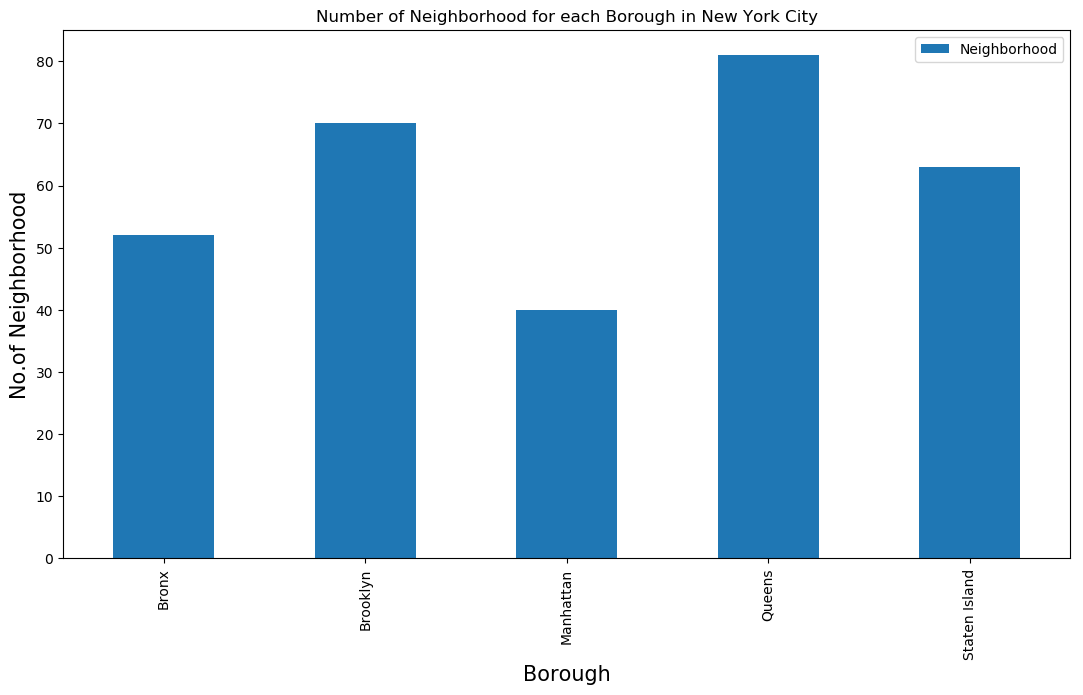

In [28]:

plt.figure(figsize=(13,7), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Based from the graph above it shows that Queens has the most number of neighborhoods

Will now collect Japanese restaurants for each surrounding neighborhood

## Latitude and Longitude coordinates of New York City

In [1]:
latitude = 40.7128
longitude = 74.0060

In [32]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Japanese Restaurants'
radius = 1000
LIMIT= 100
print('Finding  ' + search_query + ' .... OK!')

40.7127281 -74.0060152
Finding  Japanese Restaurants .... OK!


## define URL


In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0EKUN1AMSM4SZSXJ0YZASVICCFHXRJOFGRH5O0G121CLEFRF&client_secret=KOIPKN3OXVYUJ5D3VPCOCLHBYAHAXFJFAN1ADWE5KGZ031FP&ll=40.7127281,-74.0060152&v=20180604&query=Japanese Restaurants&radius=1000&limit=30'

In [8]:
import requests
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed03d88b9a389001b4e6535'},
 'response': {'venues': [{'id': '4b78ac62f964a52047dd2ee3',
    'name': 'Zutto Japanese American Pub',
    'location': {'address': '77 Hudson St',
     'crossStreet': 'Harrison St and Worth St.',
     'lat': 40.7185655837561,
     'lng': -74.00891273768076,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.7185655837561,
       'lng': -74.00891273768076},
      {'label': 'entrance', 'lat': 40.718459, 'lng': -74.009006}],
     'distance': 694,
     'postalCode': '10013',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['77 Hudson St (Harrison St and Worth St.)',
      'New York, NY 10013',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1d1941735',
      'name': 'Noodle House',
      'pluralName': 'Noodle Houses',
      'shortName': 'Noodles',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ramen_',


In [10]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",867441,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/zutto-77-hudson-...,False,4b78ac62f964a52047dd2ee3,77 Hudson St,US,New York,United States,Harrison St and Worth St.,694,"[77 Hudson St (Harrison St and Worth St.), New...","[{'label': 'display', 'lat': 40.7185655837561,...",40.718566,-74.008913,NaN,10013,NY,Zutto Japanese American Pub,v-1590705701,42701794
1,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,52ba2914498e565780aa9115,NaN,US,New York,United States,NaN,642,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.714336, 'lng':...",40.714336,-73.998701,NaN,NaN,NY,Japanese Supermarket,v-1590705701,NaN
2,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,525dd5f311d24f5e606f5d4a,NaN,US,New York,United States,NaN,685,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.715313, 'lng':...",40.715313,-73.998637,NaN,NaN,NY,Japanese Anime Souvenir Toys And Games,v-1590705701,NaN
3,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b7736b9f964a5206b882ee3,96 Bowery,US,New York,United States,btw Hester & Grand,1051,"[96 Bowery (btw Hester & Grand), New York, NY ...","[{'label': 'display', 'lat': 40.71758147589841...",40.717581,-73.995330,NaN,10013,NY,Emperor Japanese Tapas Shabu,v-1590705701,NaN
4,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4be84f89c5220f472d95a9ca,153 Chambers St,US,New York,United States,William St.,274,"[153 Chambers St (William St.), New York, NY 1...","[{'label': 'display', 'lat': 40.71031250340588...",40.710313,-74.005344,NaN,10007,NY,Subway,v-1590705701,NaN


In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

## Filtering to the names of the restaurant only

In [58]:
dataframe_filtered.name

0                         Zutto Japanese American Pub
1                                Japanese Supermarket
2              Japanese Anime Souvenir Toys And Games
3                        Emperor Japanese Tapas Shabu
4                                              Subway
5                           Kaede Japanese Restaurant
6                                               Korin
7                                       Mana Japanese
8                             WFC Shops & Restaurants
9                                   AA Japanese Ramen
10                       SUteiShi Japanese Restaurant
11                            Aoi Japanese Restaurant
12                                           China 59
13                         Nagoya Japanese Restaurant
14                                             Masuya
15                            Koi Japanese Restaurant
16                                       Shinju Sushi
17                          Yoshi Japanese Restaurant
18                         N

# Results are the folium maps produced

In [50]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around New York City

# add a red circle marker to represent New York City
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York City',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Japanese restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [21]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=0EKUN1AMSM4SZSXJ0YZASVICCFHXRJOFGRH5O0G121CLEFRF&client_secret=KOIPKN3OXVYUJ5D3VPCOCLHBYAHAXFJFAN1ADWE5KGZ031FP&ll=40.7127281,-74.0060152&v=20180604&radius=1000&limit=30'

## How many Japanese Restaurants in New York City?

In [23]:
results = requests.get(url).json()
'There are {} Japanese restaurants in New York City.'.format(len(results['response']['groups'][0]['items']))

'There are 30 Japanese restaurants in New York City.'

## Make it more specific to the areas around the japanese restaurants

In [43]:
Manhattan_Data =  new_york_data[ new_york_data['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_Data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


## Map of Manhattan

In [48]:
# create map of New York using latitude and longitude values
manhattan_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Manhattan_Data['Latitude'], Manhattan_Data['Longitude'], Manhattan_Data['Borough'], Manhattan_Data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(manhattan_newyork)  
    

    
manhattan_newyork

# Conclusion


## Based on the two maps we can see that there are clusters of japanese restaurants around New York City. However, in the Lower East side, East village, and Stuvyesant Town of Manhattan, Japanese food seems to be nonexistent there. If an entrepenuer were to start up shop for Japanese cuisine specifically it would be best to begin there. 

## To best dive in directly to Japanese culture and find restaurants that relate to that it would be best to go to the Civic Center, Battery Park City, and Financial District as there based on the data shows the most restaurants that serve Japanese food.
